# 1. Overview: An example of a power system optimization problem 



## 1.1 Objective

This module leverages cyber infrastructure to conduct a day-ahead economic dispatch on a modified PJM 5-bus system, demonstrating how cyber infrastructure can be utilized to model and solve a power system optimization problem for electric grid operation. Electric grid operation needs to schedule generation resources to satisfy the load economically and reliably. This task is done through grid optimization with unit commitment and economic dispatch (UCED). UCED determines the optimal. The cyber infrastructure leveraged in this module includes Python, Jupyter Notebook, NumPy, GurobiPy, and Matplotlib.



## 1.2 Key Components

1.  Formulating the mathematical model for the optimization problem.
2.	Inputting system parameters and calculating the Shift Factors matrix.
3.	Formulating the optimization problem in cyber infrastructure and solving the optimization problem.
4.	Extracting the optimization results and displaying the outcomes.


This module provides an effective PowerCyber training, facilitating the utilization of cyber infrastructure to conduct studies and research in the power domain.

<br><br>

# 2. Formulating the mathematical model for the optimization problem

The mathematical model for day-ahead economic dispatch in this module is as follows:

The objective function is to minimize the generation cost, where $P_{i,t}$ represents the output of generator $i$ in time period $t$, $C_g(P_{i,t})$ denotes the generation cost of generator $i$ in time period $t$, $N_g$ is the total number of generators, and $T$ is the total number of scheduling periods.

$$\min \sum_{i=1}^{N_g} \sum_{t=1}^{T} C_g(P_{i,t})  \qquad (1)$$


The constraints are as follows. For example, the generator's ramping constraint,  where $\Delta P_{i}^{U}$ represents the ramp-up limit and $\Delta P_{i}^{D}$ represents the ramp-down limit.

$$P_{i,t} - P_{i,t-1} \leq  \Delta P_{i}^{U}  \qquad (2)$$ 

$$P_{i,t-1} - P_{i,t} \leq  \Delta P_{i}^{D}  \qquad (3)$$


System load balance constraints, where $D_{k,t}$ represents the load at bus $k$ during time period $t$, and $K$ denotes the total number of buses.

$$\sum_{i=1}^{N_{g}} P_{i,t} \geq \sum_{k=1}^{K}D_{k,t} \qquad (4)$$


Line flow limit constraints, where GSF represents the shift factor matrix, and $P_{l}^{max}$ denotes the line flow limit.

$$\sum_{i=1}^{N_{i}}GSF_{l-i}*P_{i,t}-\sum_{k=1}^{N_{l}}GSF_{l-k}*D_{k,t}\geq -P_{l}^{max}  \qquad (5)$$

$$\sum_{i=1}^{N_{i}}GSF_{l-i}*P_{i,t}-\sum_{k=1}^{N_{l}}GSF_{l-k}*D_{k,t}\leq P_{l}^{max}  \qquad (6)$$


Generator output limit constraints, where $P_{i}^{max}$ and $P_{i}^{min}$ represent the upper and lower output limits of generator $i$, respectively.

$$P_{i}^{min}\leq P_{i,t}\leq P_{i}^{max}  \qquad (7)$$

<br><br>

# 3. Modified PJM 5-bus system

## 3.1 Overview
The PJM 5-bus system was originally published as early as 1999 [1]. This system ishown in Fig. 1 [1], which includes a total of 5 buses, 6 lines, 5 generators, and 3 loads. Based on the PJM 5-bus system used in [1], our module introduces several modifications to the parameters. Further details are presented in the following sections.


![Fig. 1. The PJM 5-bus system [1]](PJM_5_BUS_system.png)

**Fig. 1. The PJM 5-bus system [1]**



## 3.2 Generator parameters
The parameters of the generators are presented below. Each generator's ramp rate is set to 50% [2] of its maximum power output, and the minimum power output for each generator is assumed to be 20% of its maximum power output.


| Name | Location | Ramping limit (MW) | Min (MW) | Max (MW) | Price ($/MWh) |
|------------------|----------|--------------------|--------|--------|---------------|
| Alta             | Bus A    | 55                | 22      | 110    | 14            |
| Park City        | Bus A    | 50                | 20      | 100    | 15            |
| Solitude         | Bus C    | 260               | 104     | 520    | 20            |
| Sundance         | Bus D    | 100               | 40      | 200    | 19            |
| Brighton         | Bus E    | 300               | 120     | 600    | 10            |


## 3.3 Line parameters
The parameters of the lines are presented below. 

| Line | From bus | To bus | Reactance p.u. | Flow Limit MW |
|------|----------|--------|----------------|---------------|
| A-B  | A        | B      | 0.0281         | 400          |
| A-D  | A        | D      | 0.0304         | 300          |
| B-C  | B        | C      | 0.0108         | 400          |
| C-D  | C        | D      | 0.0297         | 400          |
| D-E  | D        | E      | 0.0297         | 240          |
| E-A  | E        | A      | 0.0064         | 300          |


## 3.4 Load parameters
The load for each bus throughout the 24 hours is presented below.

| Bus | Hour 1 | Hour 2 | Hour 3 | Hour 4 | Hour 5 | Hour 6 | Hour 7 | Hour 8 | Hour 9 | Hour 10 | Hour 11 | Hour 12 | Hour 13 | Hour 14 | Hour 15 | Hour 16 | Hour 17 | Hour 18 | Hour 19 | Hour 20 | Hour 21 | Hour 22 | Hour 23 | Hour 24 |
|-----|--------|--------|--------|--------|--------|--------|--------|--------|--------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
| Bus A | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 |
| Bus B | 181.72 | 196.03 | 210.33 | 224.64 | 238.94 | 245.90 | 252.86 | 259.81 | 266.77 | 273.73 | 280.69 | 287.64 | 294.60 | 276.22 | 257.84 | 239.46 | 221.09 | 234.59 | 248.09 | 261.59 | 275.08 | 251.65 | 228.21 | 204.78 |
| Bus C | 184.62 | 194.86 | 205.11 | 215.36 | 225.60 | 235.62 | 245.64 | 255.67 | 265.69 | 275.71 | 285.73 | 295.75 | 305.77 | 289.15 | 272.53 | 255.91 | 239.30 | 251.58 | 263.86 | 276.15 | 288.43 | 262.07 | 235.70 | 209.34 |
| Bus D | 274.10 | 289.67 | 305.23 | 320.80 | 336.37 | 344.47 | 352.58 | 360.68 | 368.79 | 376.89 | 385.00 | 393.10 | 401.21 | 383.78 | 366.36 | 348.93 | 331.51 | 344.62 | 357.73 | 370.85 | 383.96 | 358.45 | 332.94 | 307.43 |
| Bus E | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 |


## References
[1] F. Li and R. Bo, "Small Test Systems for Power System Economic Studies," 2010 IEEE PES General Meeting, Minneapolis, MN, USA, 2010, pp. 1-4, doi: 10.1109/PES.2010.5589973.

[2] X. Fang, F. Li, Y. Wei, and H. Cui, "Strategic scheduling of energy storage for load serving entities in locational marginal pricing market," IET Generation, Transmission & Distribution, vol. 9, no. 4, pp. 358–365, Apr. 2015, doi: 10.1049/iet-gtd.2015.0144.


<br><br>

# 4. Inputting system parameters and calculating the Shift Factors matrix









First, numpy [1] is imported for scientific computing and efficient array operations. NumPy is a powerful array programming library in Python, widely used across different fields for scientific research and data analysis. Serving as the foundation of the scientific Python ecosystem, NumPy offers powerful data manipulation interfaces and acts as an interoperability layer between various array computation libraries [1].


In [112]:
import numpy as np

To facilitate programming, we will use the terms 'generator 1', 'generator 2', 'generator 3', 'generator 4', 'generator 5' to refer respectively to the generators Alta, Park City, Solitude, Sundance, and Brighton. Similarly, 'line 1', 'line 2', 'line 3', 'line 4', 'line 5' will correspond to the lines A-B, A-D, B-C, C-D, D-E, and E-A.
Then, we record the number of generators, lines, and buses used in the modified PJM 5-bus system employed in this module, designating bus 1 as the reference bus. Additionally, we set the total number of time periods for the day-ahead economic dispatch to 24, with each period assumed to represent 1 hour:

In [113]:
N_gen= 5
N_line=6
bus_num=5
ref_bus = 1 
N_interval=24

Thereafter, we set generators' maximum outputs:

In [114]:
gen_max=np.zeros(N_gen)
gen_max[0]=110
gen_max[1]=100
gen_max[2]=520
gen_max[3]=200
gen_max[4]=600
print("Gen_max:")
print(gen_max)

Gen_max:
[110. 100. 520. 200. 600.]


Subsequently, we set generators' minimum outputs, the minimum outputs of the generators are assumed to be 20% of their maximum outputs:

In [115]:
gen_min=np.zeros(N_gen)
gen_min=0.2*gen_max
print("Gen_min:")
print(gen_min)

Gen_min:
[ 22.  20. 104.  40. 120.]


Afterwards, we set generators' ramping rates, the ramping rates are assumed to be 50% of their maximum outputs:

In [116]:
gen_ramping=np.zeros(N_gen)
gen_ramping=gen_max*0.5
print("Gen_ramping:")
print(gen_ramping)

Gen_ramping:
[ 55.  50. 260. 100. 300.]


Next, we set the generators' costs, here we assume each unit has a fixed cost per MWh of output:

In [117]:
gen_cost=np.zeros(N_gen)
gen_cost[0]=14
gen_cost[1]=15
gen_cost[2]=20
gen_cost[3]=19
gen_cost[4]=10
print("Gen_cost:")
print(gen_cost)

Gen_cost:
[14. 15. 20. 19. 10.]


Then, we set the load forecast for each bus over the 24-hour period. Here, we construct a daily load profile with a dual peak, occurring at midday and in the evening.

In [118]:
load = np.array([
    [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ],
    [181.72, 196.03, 210.33, 224.64, 238.94, 245.9 , 252.86, 259.81, 266.77, 273.73, 280.69, 287.64, 294.6 , 276.22, 257.84, 239.46, 221.09, 234.59, 248.09, 261.59, 275.08, 251.65, 228.21, 204.78],
    [184.62, 194.86, 205.11, 215.36, 225.6 , 235.62, 245.64, 255.67, 265.69, 275.71, 285.73, 295.75, 305.77, 289.15, 272.53, 255.91, 239.3 , 251.58, 263.86, 276.15, 288.43, 262.07, 235.7 , 209.34],
    [274.1 , 289.67, 305.23, 320.8 , 336.37, 344.47, 352.58, 360.68, 368.79, 376.89, 385.  , 393.1 , 401.21, 383.78, 366.36, 348.93, 331.51, 344.62, 357.73, 370.85, 383.96, 358.45, 332.94, 307.43],
    [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ]
])
print("Load:")
print(load)

Load:
[[  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.  ]
 [181.72 196.03 210.33 224.64 238.94 245.9  252.86 259.81 266.77 273.73
  280.69 287.64 294.6  276.22 257.84 239.46 221.09 234.59 248.09 261.59
  275.08 251.65 228.21 204.78]
 [184.62 194.86 205.11 215.36 225.6  235.62 245.64 255.67 265.69 275.71
  285.73 295.75 305.77 289.15 272.53 255.91 239.3  251.58 263.86 276.15
  288.43 262.07 235.7  209.34]
 [274.1  289.67 305.23 320.8  336.37 344.47 352.58 360.68 368.79 376.89
  385.   393.1  401.21 383.78 366.36 348.93 331.51 344.62 357.73 370.85
  383.96 358.45 332.94 307.43]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.  ]]


Next, we set the line flow limit for each transmission line:

In [119]:
line_max=np.zeros(N_line)
line_max[0]=400
line_max[1]=300
line_max[2]=400
line_max[3]=400
line_max[4]=240
line_max[5]=300
print("Line_flow_limit:")
print(line_max)

Line_flow_limit:
[400. 300. 400. 400. 240. 300.]


Subsequently, we set the line's impedance parameters. Here we only consider reactance:

In [120]:
branch_data = [
    (1, 1, 2, 0.0281),
    (2, 1, 4, 0.0304),
    (3, 2, 3, 0.0108),
    (4, 3, 4, 0.0297),
    (5, 4, 5, 0.0297),
    (6, 5, 1, 0.0064),        
]

Following this, we can calculate the B_matrix, which is the foundation for calculatig the Shift Factors matrix.

In [121]:
B_matrix = np.zeros((N_gen, N_gen))
for _, i, j, reactance in branch_data:
    i, j = i - 1, j - 1 
    Y = 1 / reactance
    B_matrix[i][j] = B_matrix[j][i] = -Y  
for i in range(N_gen):
    B_matrix[i][i] = -np.sum(B_matrix[i])  
print("B_matrix:")
print(B_matrix)

B_matrix:
[[ 224.73192545  -35.58718861    0.          -32.89473684 -156.25      ]
 [ -35.58718861  128.1797812   -92.59259259    0.            0.        ]
 [   0.          -92.59259259  126.26262626  -33.67003367    0.        ]
 [ -32.89473684    0.          -33.67003367  100.23480418  -33.67003367]
 [-156.25          0.            0.          -33.67003367  189.92003367]]


Based on the previously calculated B matrix, we can now calculate the system's Shift Factors matrix:

In [122]:
def calculate_shift_factors(B_matrix, branch_data, inj_bus, ref_bus):
    n = B_matrix.shape[0]
    B_reduce = np.delete(np.delete(B_matrix, ref_bus - 1, axis=0), ref_bus - 1, axis=1)
    delta_P = np.zeros(n)
    
    delta_P[ref_bus - 1] = -1 
    delta_P[inj_bus - 1] = delta_P[inj_bus - 1]+1  
    delta_P_reduce = np.delete(delta_P, ref_bus - 1, axis=0)
                        
    delta_theta = np.linalg.solve(B_reduce, delta_P_reduce)
    
    delta_theta = np.insert(delta_theta, ref_bus - 1, 0)

    SF_matrix = np.zeros(len(branch_data))

    for index, (branch, i, j, reactance) in enumerate(branch_data):
        i, j = i - 1, j - 1  
        SF_matrix[index] = (delta_theta[i] - delta_theta[j]) / reactance

    return SF_matrix
 
SF=np.zeros((N_line,bus_num))
 
for inj_bus in range(bus_num):
    
    SF[:,inj_bus] = calculate_shift_factors(B_matrix, branch_data, inj_bus+1, ref_bus)

print("Shift Factors matrix:")
print(SF)

Shift Factors matrix:
[[ 0.         -0.66981132 -0.54290606 -0.19391661 -0.03437857]
 [ 0.         -0.17924528 -0.24813671 -0.43758813 -0.07757795]
 [ 0.          0.33018868 -0.54290606 -0.19391661 -0.03437857]
 [ 0.          0.33018868  0.45709394 -0.19391661 -0.03437857]
 [ 0.          0.1509434   0.20895723  0.36849527 -0.11195652]
 [ 0.          0.1509434   0.20895723  0.36849527  0.88804348]]


## References

[1] Harris, C.R., Millman, K.J., van der Walt, S.J. et al. Array programming with NumPy. Nature 585, 357–362 (2020). DOI: 10.1038/s41586-020-2649-2.

<br><br>

# 5. Formulating the optimization problem in cyber infrastructure and solving the optimization problem

We use Gurobipy [1] to model and solve this mathematical formulation. The Gurobi Optimizer is a mathematical optimization software designed to solve a wide range of optimization problems [2]. Gurobipy is the official Python interface provided by Gurobi, enabling seamless integration of the optimizer within Python environments for efficient model building and solution processes. The Gurobipy package includes a trial license, which allows users to solve problems of limited size [2]. However, students and faculty affiliated with academic institutions are eligible for a free, full-featured license [2].

First, if you have not installed Gurobipy, you can install it in Jupyter Notebook using the following command:

In [123]:
#install gurobipy
get_ipython().run_line_magic('pip', 'install gurobipy')

Note: you may need to restart the kernel to use updated packages.


Next, you need to import the entire gurobipy library and import the GRB constants from gurobipy.

In [124]:
import gurobipy as grb
from gurobipy import GRB

Following this, you will use gurobipy to construct a day-ahead economic dispatch optimization model. The first steps are to create a new optimization model instance, define the decision variables, and set up the objective function.

In [125]:
#create a new optimization model
M = grb.Model()
#define the decision variables
P_i_t = M.addVars(N_gen, N_interval, vtype = GRB.CONTINUOUS, name='gen_output')
#set up the objective function
gen_fuel_cost = grb.quicksum(gen_cost[i]*(P_i_t[i,t]) for i in range(N_gen) for t in range(N_interval)) 
M.setObjective(gen_fuel_cost, GRB.MINIMIZE)

Next, you need to define various constraints, such as ramping constraints (In this case, we assume the ramp-up and ramp-down limits are identical):

In [126]:
M.addConstrs((P_i_t[i,t]-P_i_t[i,t-1]<=gen_ramping[i] for i in range(N_gen)  for t in range(1,N_interval)),name='con_1')
M.addConstrs((P_i_t[i,t-1]-P_i_t[i,t]<=gen_ramping[i] for i in range(N_gen)  for t in range(1,N_interval)),name='con_2')
M.update() 

System load balance constraints:

In [127]:
M.addConstrs((grb.quicksum(P_i_t[i,t] for i in range(N_gen)) >= 
              grb.quicksum(load[p,t] for p in range(bus_num)) for t in range(N_interval)),name='con_3')
M.update() 

Line flow limit constraints:

In [128]:
M.addConstrs((SF[l,0]*(P_i_t[0,t]+P_i_t[1,t])+SF[l,2]*P_i_t[2,t]+SF[l,3]*P_i_t[3,t]+
              SF[l,4]*P_i_t[4,t]-(SF[l,0]*load[0,t]+SF[l,1]*load[1,t]+SF[l,2]*load[2,t]+
                                  SF[l,3]*load[3,t]+SF[l,4]*load[4,t]) <= line_max[l] 
              for l in range(N_line) for t in range(N_interval)),name='con_4')
M.addConstrs((SF[l,0]*(P_i_t[0,t]+P_i_t[1,t])+SF[l,2]*P_i_t[2,t]+SF[l,3]*P_i_t[3,t]+
              SF[l,4]*P_i_t[4,t]-(SF[l,0]*load[0,t]+SF[l,1]*load[1,t]+SF[l,2]*load[2,t]+
                                  SF[l,3]*load[3,t]+SF[l,4]*load[4,t]) >= -line_max[l] 
              for l in range(N_line) for t in range(N_interval)),name='con_5')
M.update() 

Generator output limit constraints:

In [129]:
M.addConstrs((P_i_t[i,t] <= gen_max[i] for i in range(N_gen) for t in range(N_interval)),name='con_6')
M.addConstrs((P_i_t[i,t] >=gen_min[i]  for i in range(N_gen) for t in range(N_interval)),name='con_7')
M.update() 

Now, you can invoke Gurobi to solve this optimization problem using the following command:

In [130]:
M.optimize()       

Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (win64 - Windows 11.0 (26100.2))

CPU model: 12th Gen Intel(R) Core(TM) i5-12500H, instruction set [SSE2|AVX|AVX2]
Thread count: 12 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 782 rows, 120 columns and 1684 nonzeros
Model fingerprint: 0x83f402d8
Coefficient statistics:
  Matrix range     [3e-02, 1e+00]
  Objective range  [1e+01, 2e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 1e+03]
Presolve removed 605 rows and 0 columns
Presolve time: 0.01s
Presolved: 177 rows, 235 columns, 579 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.4377912e+05   1.029226e+03   0.000000e+00      0s
      60    2.5845501e+05   0.000000e+00   0.000000e+00      0s

Solved in 60 iterations and 0.01 seconds (0.00 work units)
Optimal objective  2.584550141e+05


From the solution results presented above, it can be observed that the computational time for solving this optimization problem was 0.01 seconds, with an optimal objective value of 2.584550141e+05.

## References

[1] Gurobi Optimization, LLC, “Gurobi Optimizer Reference Manual,” 2024.

[2] Gurobi Optimization, LLC, “GurobiPy: Python interface for the Gurobi Optimizer,” PyPI, [Online]. Available: https://pypi.org/project/gurobipy/


<br><br>

# 6. Extracting the optimization results and displaying the outcomes

First, we extract the decision variables corresponding to the solution of our optimization model:

In [131]:
#Extract optimization results
P_i_t_1 = np.zeros((N_gen,N_interval+1))
for i in range(0,N_gen):
    for t in range(1,N_interval+1):
        P_i_t_1[i,t] =  P_i_t[i,t-1].X

Next, we import matplotlib.pyplot [1] to display the results mentioned above. The matplotlib.pyplot module provides a suite of functions designed to emulate MATLAB-like functionality within Matplotlib, facilitating interactive plotting and visualization in Python [2].

In [132]:
#Import matplotlib.pyplot for plotting
import matplotlib.pyplot as plt

Then, we can display the results using matplotlib.pyplot:

Set the font size in the figure to 16:

In [133]:
plt.rcParams.update({'font.size': 16})  

Set the figure size to figsize=(9, 5):

In [134]:
plt.figure(figsize=(9, 5))

<Figure size 900x500 with 0 Axes>

<Figure size 900x500 with 0 Axes>

Set the line styles and markers:

In [135]:
line_styles = ['-', '--', '-.', ':', (0, (3, 10, 1, 10))]
markers = ['o', 's', '^', 'D', 'x']

Plot the output of each generator across all time periods, then configure the display characteristics of the legend, x-axis, and y-axis, then generate the figure:

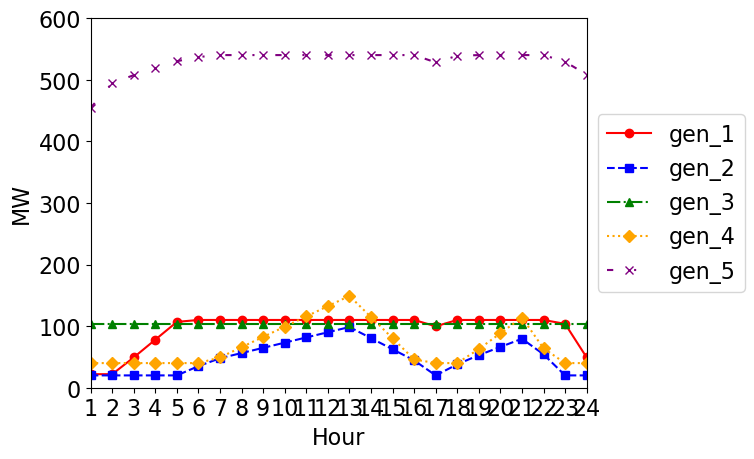

In [136]:
plt.plot(np.arange(1, 25), P_i_t_1[0,1:], color='red', linestyle=line_styles[0], marker=markers[0], label='gen_1')
plt.plot(np.arange(1, 25), P_i_t_1[1,1:], color='blue', linestyle=line_styles[1], marker=markers[1], label='gen_2')
plt.plot(np.arange(1, 25), P_i_t_1[2,1:], color='green', linestyle=line_styles[2], marker=markers[2], label='gen_3')
plt.plot(np.arange(1, 25), P_i_t_1[3,1:], color='orange', linestyle=line_styles[3], marker=markers[3], label='gen_4')
plt.plot(np.arange(1, 25), P_i_t_1[4,1:], color='purple', linestyle=line_styles[4], marker=markers[4], label='gen_5')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Hour')  
plt.ylabel('MW')
plt.xticks(np.arange(1, 25, 1))  
plt.xlim(1, 24)
plt.ylim(0, 600)
plt.show()

Building on the optimization results for the decision variables obtained above, further analytical calculations can be conducted. For instance, we can determine the scheduling cost for each generating unit:

In [137]:
#Calculate each generator's cost 
individual_gen_cost=np.zeros(N_gen)
for i in range(N_gen):
    individual_gen_cost[i]=gen_cost[i]*sum(P_i_t_1[i,1:])
    print(f'Operating cost of individual gen {i+1}: {individual_gen_cost[i]:.2f}')    

Operating cost of individual gen 1: 32070.73
Operating cost of individual gen 2: 17780.64
Operating cost of individual gen 3: 49920.00
Operating cost of individual gen 4: 31616.99
Operating cost of individual gen 5: 127066.65


## References

[1] J. D. Hunter, "Matplotlib: A 2D graphics environment," Computing in Science & Engineering, vol. 9, no. 3, pp. 90-95, 2007, doi: 10.1109/MCSE.2007.55.

[2] Matplotlib Developers, "Pyplot tutorial," Matplotlib Documentation, https://matplotlib.org/stable/tutorials/pyplot.html 